In [22]:
from tensorflow.keras.models import Sequential #for initialising models
from tensorflow.keras.layers import Dense # adding layers
from tensorflow.keras.layers import Conv2D #convolution layer
from tensorflow.keras.layers import MaxPool2D #max pooling
from tensorflow.keras.layers import Flatten #Flatten layer

In [23]:
import matplotlib.pyplot as plt

In [24]:
model=Sequential()

In [25]:
model.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [26]:
model.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [27]:
model.add(MaxPool2D(pool_size=(2,2),name='n1'))

In [28]:
model.add(Flatten())

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
n1 (MaxPooling2D)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
Total params: 10,144
Trainable params: 10,144
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.add(Dense(units=128,activation='relu',kernel_initializer='random_uniform'))

In [31]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='random_uniform'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 21, 21, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
n1 (MaxPooling2D)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               36992     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 47,265
Trainable params: 47,265
Non-trainable params: 0
__________________________________________________

In [33]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
from keras.preprocessing.image import ImageDataGenerator

In [35]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
#1./255->1 to 255
test_datagen=ImageDataGenerator(rescale=1./255)

In [36]:
x_train=train_datagen.flow_from_directory('brain_tumor_dataset/train',target_size=(64,64),batch_size=32,class_mode='binary')
x_test=test_datagen.flow_from_directory('brain_tumor_dataset/test',target_size=(64,64),batch_size=32,class_mode='binary')
# more than 2 categories -> class_mode='categorical'

Found 157 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


In [37]:
print(x_train.class_indices)

{'no': 0, 'yes': 1}


In [38]:
model.fit_generator(x_train,validation_data=x_test,epochs=50,validation_steps=len(x_test))

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
model.fit_generator(x_train,validation_data=x_test,epochs=50,validation_steps=len(x_test))

Epoch 1/50
5/5 [==============================] - 2s 373ms/step - loss: 0.3540 - accuracy: 0.8535 - val_loss: 0.4807 - val_accuracy: 0.7604
Epoch 2/50
5/5 [==============================] - 2s 340ms/step - loss: 0.3521 - accuracy: 0.8662 - val_loss: 0.5064 - val_accuracy: 0.7188
Epoch 3/50
5/5 [==============================] - 1s 310ms/step - loss: 0.3576 - accuracy: 0.8408 - val_loss: 0.4719 - val_accuracy: 0.7500
Epoch 4/50
5/5 [==============================] - 1s 281ms/step - loss: 0.3136 - accuracy: 0.8790 - val_loss: 0.4766 - val_accuracy: 0.7396
Epoch 5/50
5/5 [==============================] - 2s 320ms/step - loss: 0.3262 - accuracy: 0.8662 - val_loss: 0.4780 - val_accuracy: 0.7500
Epoch 6/50
5/5 [==============================] - 1s 286ms/step - loss: 0.3342 - accuracy: 0.8344 - val_loss: 0.5164 - val_accuracy: 0.7396
Epoch 7/50
5/5 [==============================] - 1s 310ms/step - loss: 0.3250 - accuracy: 0.8662 - val_loss: 0.4696 - val_accuracy: 0.7604
Epoch 8/50
5/5 [====

In [ ]:
model.fit_generator(x_train,validation_data=x_test,epochs=50,validation_steps=len(x_test))

Epoch 1/50
5/5 [==============================] - 2s 404ms/step - loss: 0.2313 - accuracy: 0.8981 - val_loss: 0.5314 - val_accuracy: 0.7396
Epoch 2/50
5/5 [==============================] - 1s 309ms/step - loss: 0.2027 - accuracy: 0.9172 - val_loss: 0.5440 - val_accuracy: 0.7396
Epoch 3/50
5/5 [==============================] - 1s 307ms/step - loss: 0.2297 - accuracy: 0.8726 - val_loss: 0.5432 - val_accuracy: 0.7604
Epoch 4/50
5/5 [==============================] - 1s 280ms/step - loss: 0.2470 - accuracy: 0.9236 - val_loss: 0.5555 - val_accuracy: 0.6979
Epoch 5/50
5/5 [==============================] - 1s 300ms/step - loss: 0.2952 - accuracy: 0.8854 - val_loss: 0.6023 - val_accuracy: 0.7083
Epoch 6/50
5/5 [==============================] - 1s 311ms/step - loss: 0.2507 - accuracy: 0.8917 - val_loss: 0.5885 - val_accuracy: 0.6979
Epoch 7/50
5/5 [==============================] - 1s 245ms/step - loss: 0.2075 - accuracy: 0.9236 - val_loss: 0.6092 - val_accuracy: 0.7396
Epoch 8/50
5/5 [====

In [ ]:
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

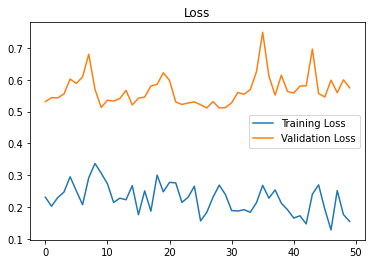

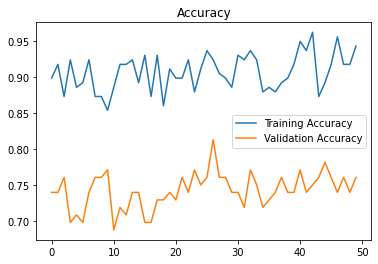

In [ ]:
history=model.history.history;
plot_metrics(history)

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

In [ ]:
model=load_model('tumor.h5')

In [ ]:
from skimage.transform import resize

In [ ]:
def detect(frame):
    img=resize(frame,(64,64))
    img=np.expand_dims(img,axis=0)
    if(np.max(img))>1:
        img=img/255.0
    prediction=model.predict(img)
    print(prediction)
    if prediction>0.5:
        print('Yes')
    else:
        print('No')

In [ ]:
frame=cv2.imread('brain_tumor_dataset/test/no/1 no.jpeg')
data=detect(frame)

[[0.07762513]]
No


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
  def cm(y_true, y_pred):
        return confusion_matrix(y_true, y_pred)

In [ ]:
y_pred = [int(round(model.predict(np.expand_dims(e,axis=0))[0][0])) for e in X_test]
y_true = [int(e[0]) for e in y_test]

NameError: name 'X_test' is not defined

In [ ]:
 cm = cm(y_true, y_pred)

    

In [ ]:
plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    classNames = ['Tumor','Not tumor']
    plt.title('Tumor or Not Tumor Confusion Matrix - Test Data')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.savefig('../output/cm')
    plt.show()

In [1]:
ofrom __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import numpy as np
from keras.preprocessing import image 


from keras.applications.imagenet_utils import preprocess_input, decode_predictions

from keras.models import load_model
from keras import backend
from tensorflow.keras import backend

import tensorflow as tf


In [2]:
from skimage.transform import resize

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
from gevent.pywsgi import WSGIServer

In [3]:
app = Flask(__name__)
MODEL_PATH = 'tumor.h5'
model = load_model(MODEL_PATH)
@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')
@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname('__file__')
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)
        img = image.load_img(file_path, target_size=(64,64))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        preds = model.predict(x)
        if preds>0.5:
            text='Yes'
        else:
            text='No'
        return text

In [4]:
if __name__ == '__main__':
    app.run(debug=False,threaded = False)

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Aug/2021 23:42:40] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Aug/2021 23:42:43] "GET /favicon.ico HTTP/1.1" 404 -
